In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
%matplotlib inline

In [ ]:
df=pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


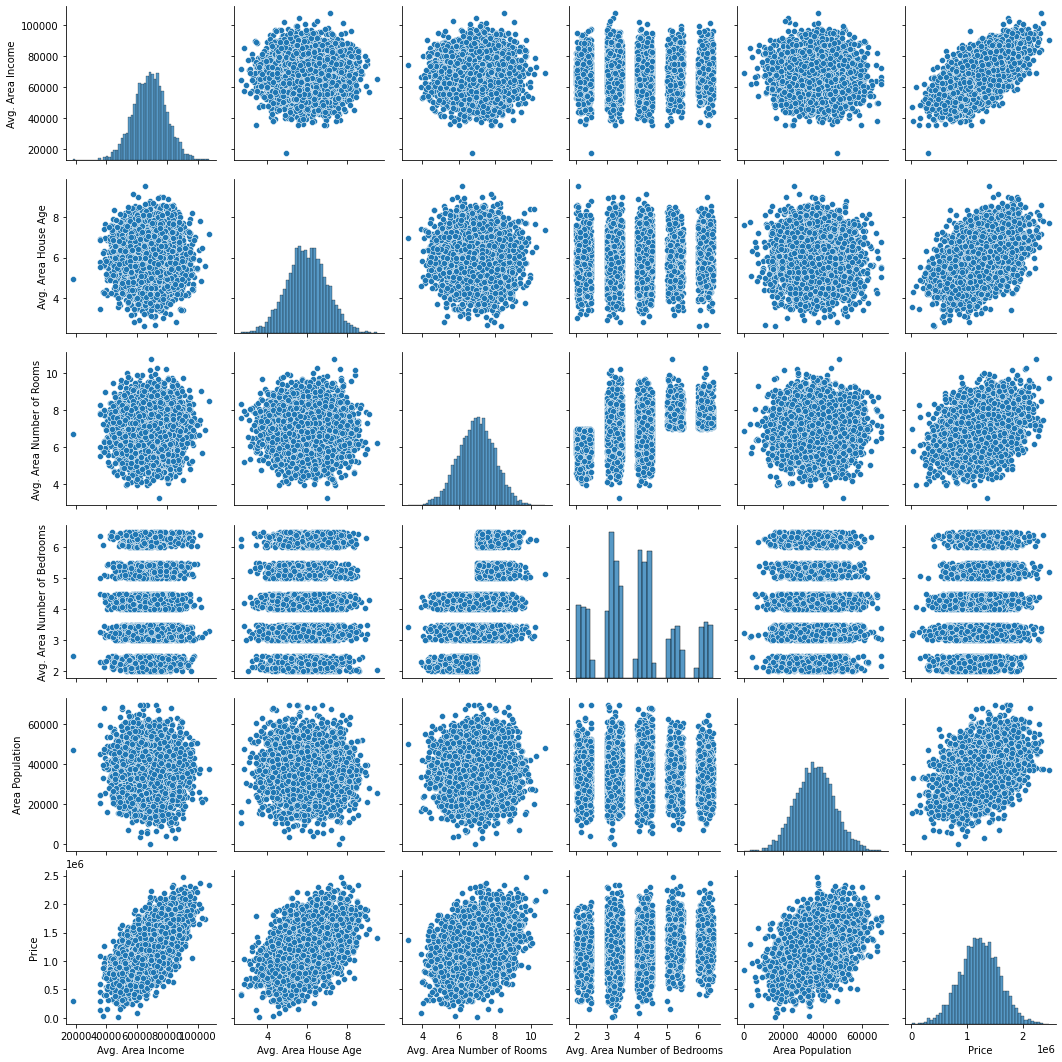

In [ ]:
sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


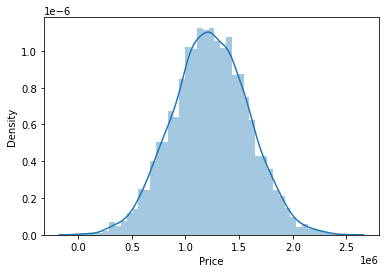

In [ ]:
sns.distplot(df['Price'])

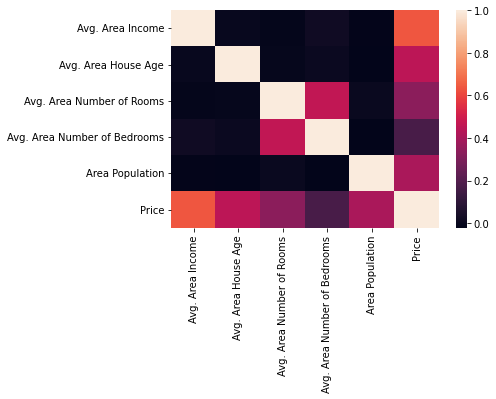

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [ ]:
X=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [ ]:
y=df['Price']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=101)

In [ ]:
lm=LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
lm.intercept_

-2640159.7968526958

In [ ]:
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [ ]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [ ]:
predictions=lm.predict(X_test)
predictions

array([1260960.70567627,  827588.75560329, 1742421.24254344, ...,
        372191.40626917, 1365217.15140898, 1914519.5417888 ])

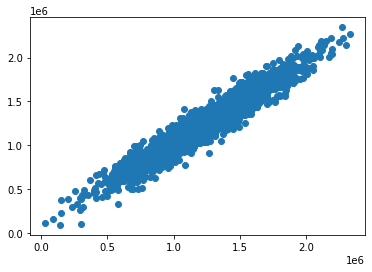

In [ ]:
plt.scatter(y_test,predictions)

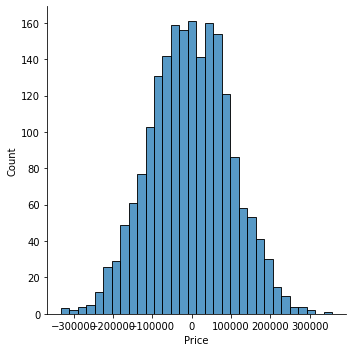

In [ ]:
sns.displot((y_test-predictions))

In [ ]:
(sum((y_test-predictions)**2)/len(predictions))**0.5

102278.82922290885

In [ ]:
from sklearn import metrics

In [ ]:
metrics.mean_absolute_error(y_test,predictions)

82288.22251914942

In [ ]:
metrics.mean_squared_error(y_test,predictions)

10460958907.208977

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

102278.82922290897

In [ ]:
df=pd.read_csv('Ecommerce Customers.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


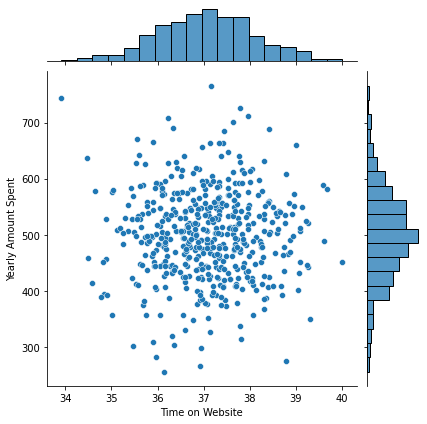

In [ ]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df)

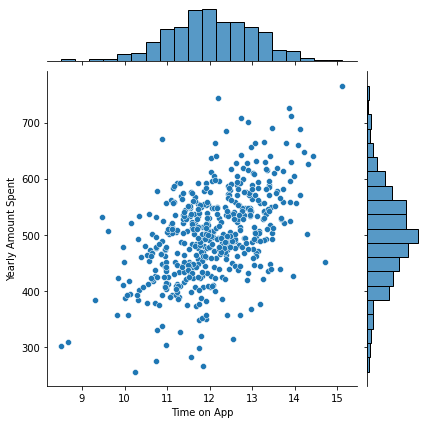

In [ ]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df)

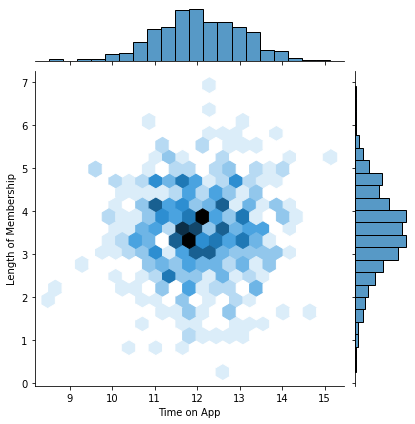

In [ ]:
sns.jointplot(x='Time on App',y='Length of Membership',data=df,kind='hex')

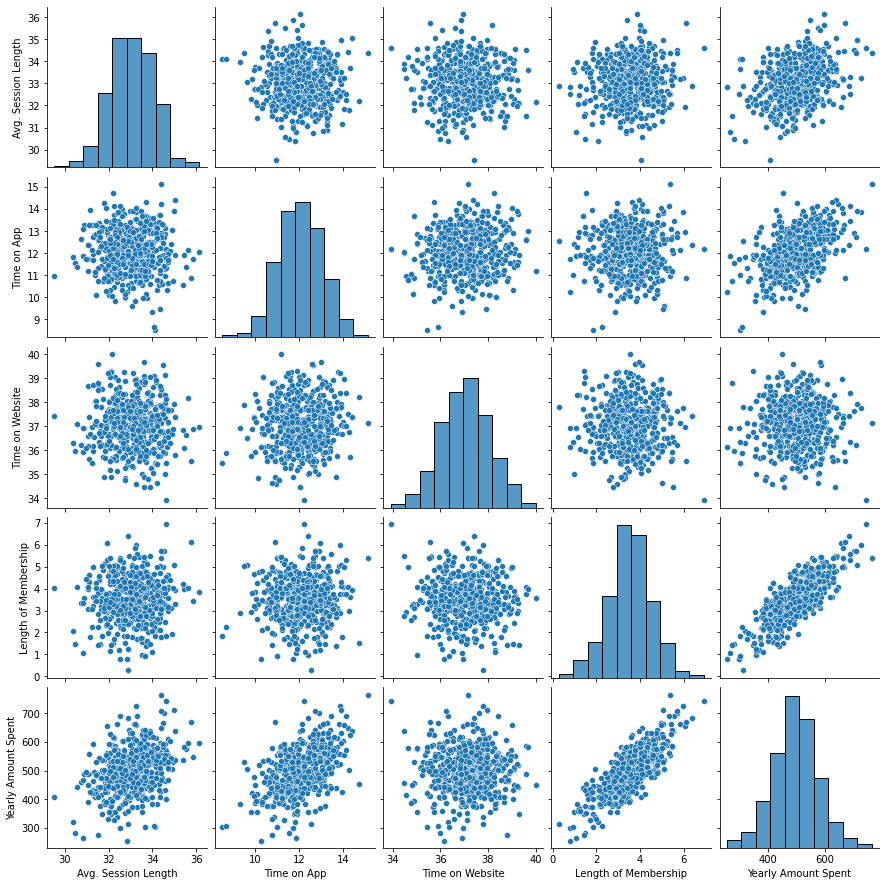

In [ ]:
sns.pairplot(df,diag_kws={'bins':10})

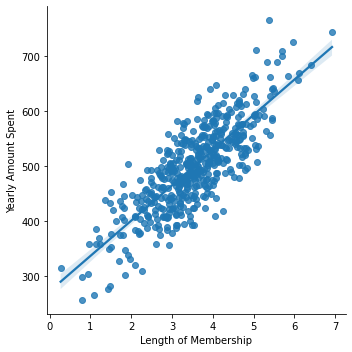

In [ ]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

In [ ]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [ ]:
X=df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y=df['Yearly Amount Spent']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
lm=LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [ ]:
lm.intercept_

-1047.9327822502391

In [ ]:
predictions=lm.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


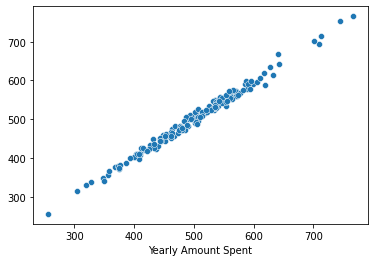

In [ ]:
sns.scatterplot(y_test,predictions)

In [ ]:
metrics.mean_absolute_error(y_test,predictions)




7.228148653430826

In [ ]:
metrics.mean_squared_error(y_test,predictions)

79.81305165097427

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

8.933815066978624

In [ ]:
pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
